In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cardiogoodfitness"

In [2]:
install.packages("ggplot2")
install.packages("gridExtra") 
install.packages("corrplot") 
install.packages("reshape2")


library(corrplot)
library(ggplot2)
library(gridExtra)
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.95 loaded




Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘reshape2’




The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
data <- read.csv("/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv")

In [4]:
head(data)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,TM195,18,Male,14,Single,3,4,29562,112
2,TM195,19,Male,15,Single,2,3,31836,75
3,TM195,19,Female,14,Partnered,4,3,30699,66
4,TM195,19,Male,12,Single,3,3,32973,85
5,TM195,20,Male,13,Partnered,4,2,35247,47
6,TM195,20,Female,14,Partnered,3,3,32973,66


In [5]:
str(data)

'data.frame':	180 obs. of  9 variables:
 $ Product      : chr  "TM195" "TM195" "TM195" "TM195" ...
 $ Age          : int  18 19 19 19 20 20 21 21 21 21 ...
 $ Gender       : chr  "Male" "Male" "Female" "Male" ...
 $ Education    : int  14 15 14 12 13 14 14 13 15 15 ...
 $ MaritalStatus: chr  "Single" "Single" "Partnered" "Single" ...
 $ Usage        : int  3 2 4 3 4 3 3 3 5 2 ...
 $ Fitness      : int  4 3 3 3 2 3 3 3 4 3 ...
 $ Income       : int  29562 31836 30699 32973 35247 32973 35247 32973 35247 37521 ...
 $ Miles        : int  112 75 66 85 47 66 75 85 141 85 ...


In [6]:
summary(data)

   Product               Age           Gender            Education    
 Length:180         Min.   :18.00   Length:180         Min.   :12.00  
 Class :character   1st Qu.:24.00   Class :character   1st Qu.:14.00  
 Mode  :character   Median :26.00   Mode  :character   Median :16.00  
                    Mean   :28.79                      Mean   :15.57  
                    3rd Qu.:33.00                      3rd Qu.:16.00  
                    Max.   :50.00                      Max.   :21.00  
 MaritalStatus          Usage          Fitness          Income      
 Length:180         Min.   :2.000   Min.   :1.000   Min.   : 29562  
 Class :character   1st Qu.:3.000   1st Qu.:3.000   1st Qu.: 44059  
 Mode  :character   Median :3.000   Median :3.000   Median : 50596  
                    Mean   :3.456   Mean   :3.311   Mean   : 53720  
                    3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.: 58668  
                    Max.   :7.000   Max.   :5.000   Max.   :104581  
     Miles      
 Mi

In [7]:
sapply(data[, sapply(data, is.character)], unique)

$Product
[1] "TM195" "TM498" "TM798"

$Gender
[1] "Male"   "Female"

$MaritalStatus
[1] "Single"    "Partnered"

We can observe:

1. The minimum Age is 18 and the maximum is 50 with a mean of 28.79 and a median of 26.00.The age graph is right-skewed.
2. The minimum Education level is 12 and the maximum is 21, with mean being 15.57.
3. Usage ranges from 2 to 7.
4. Fitness ranges from 1 to 5, with a mean of 3.3.
5. Income ranges from 29562 to 104581 per year, with a mean of 53720.
6. There are 3 products, 2 genders and 2 types of Martial status.

**We need to find the features that perfectly fit each model.**

In [8]:
sum(is.na(data))

[1] 0

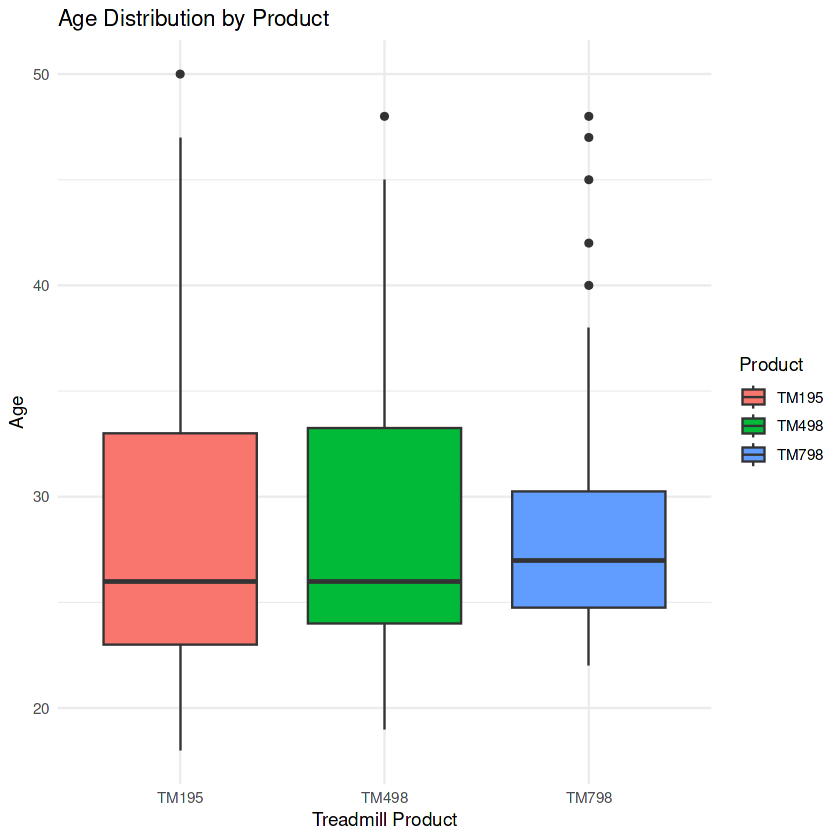

In [9]:
ggplot(data, aes(x = Product, y = Age, fill = Product)) +
  geom_boxplot() +
  theme_minimal() +
  ggtitle("Age Distribution by Product") +
  xlab("Treadmill Product") +
  ylab("Age")

**TM195 and TM498 are usually preferred by people of 26-27 years of age, while TM798 is preferred by slightly older people (around 29).**

# We have 2 categorical columns and 6 numerical ones. Let's begin by analyzing categorical columns. # 

In [10]:
table(data$Gender)


Female   Male 
    76    104 

In [11]:
table(data$MaritalStatus)


Partnered    Single 
      107        73 

In [12]:
table(data$Product)


TM195 TM498 TM798 
   80    60    40 

In [13]:
table(data$Product,data$MaritalStatus)

       
        Partnered Single
  TM195        48     32
  TM498        36     24
  TM798        23     17

In [14]:
table(data$Product,data$Gender)

       
        Female Male
  TM195     40   40
  TM498     29   31
  TM798      7   33

**Partnered individuals tend to purchase more treadmills in general than single individuals, and males prefer the TM798 more than females.**

In [15]:
table(data$Product,data$MaritalStatus,data$Gender)

, ,  = Female

       
        Partnered Single
  TM195        27     13
  TM498        15     14
  TM798         4      3

, ,  = Male

       
        Partnered Single
  TM195        21     19
  TM498        21     10
  TM798        19     14


**Let's visualize this for a better idea.**

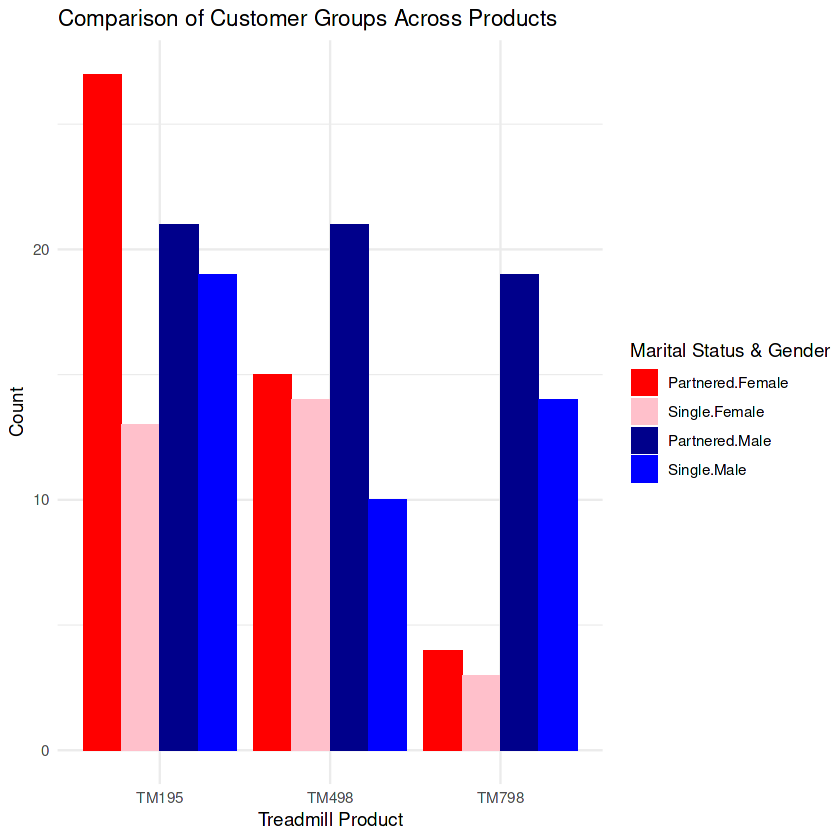

In [16]:
ggplot(data, aes(x = Product, fill = interaction(MaritalStatus, Gender))) +
  geom_bar(position = "dodge") +
  theme_minimal() +
  ggtitle("Comparison of Customer Groups Across Products") +
  xlab("Treadmill Product") +
  ylab("Count") +
  labs(fill = "Marital Status & Gender") +
  scale_fill_manual(values = c("Single.Female" = "pink", "Single.Male" = "blue",
                               "Partnered.Female" = "red", "Partnered.Male" = "darkblue"))



**We can deduce that partnered females in general prefer the TM195. However, more analysis needs to be made to get more accurate results.**

# Analyzing Numerical columns

**We begin by drawing a correlation heat map.**

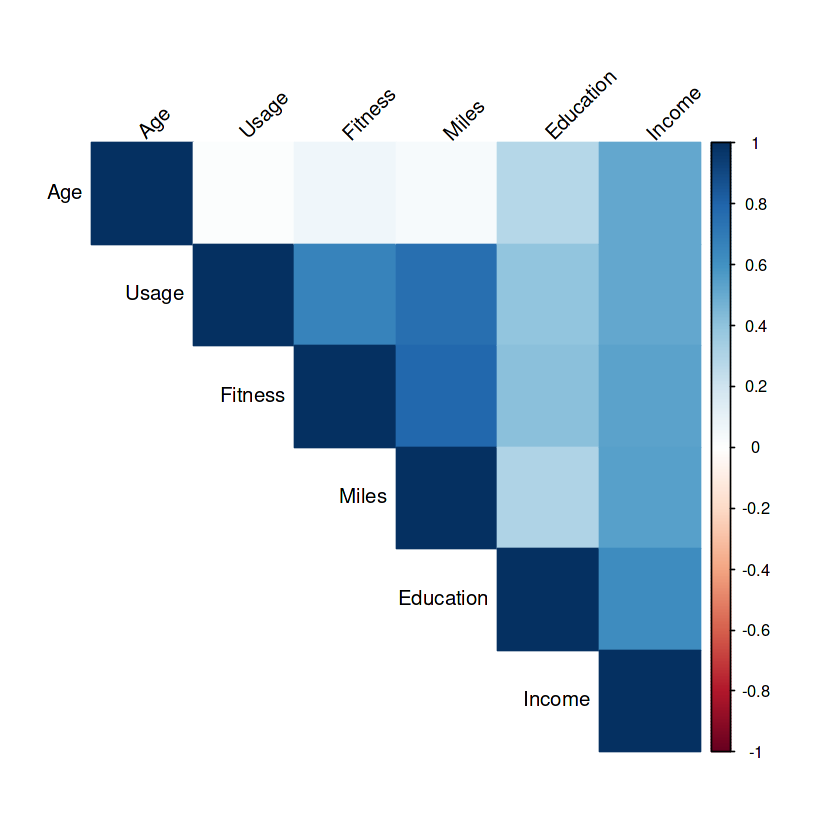

In [17]:
numerical_data <- data[, c("Age","Education","Income","Usage","Fitness","Miles")]
cor_matrix <- cor(numerical_data, use="complete.obs")

corrplot(cor_matrix, method = "color", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45)

**We can see high correlation between Miles, Usage,Fitness,and Income. We will perform further analysis for better results.**

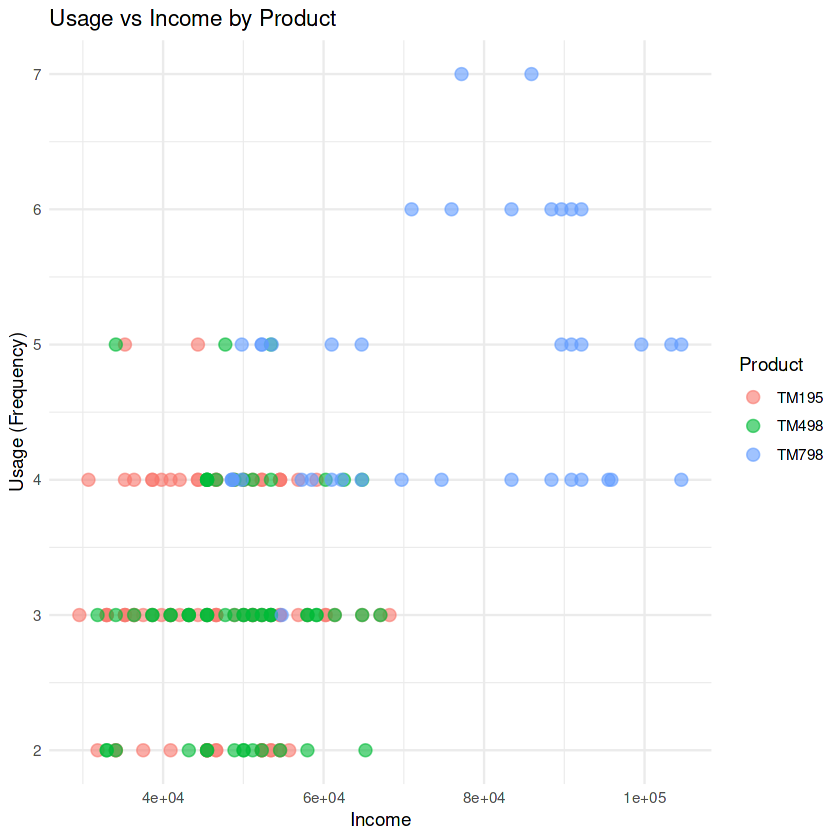

In [18]:
ggplot(data, aes(x = Income, y = Usage, color = Product)) +
  geom_point(alpha = 0.6, size = 3) +
  theme_minimal() +
  ggtitle("Usage vs Income by Product") +
  xlab("Income") +
  ylab("Usage (Frequency)")

**Lower Income and usage is often associated with TM195 and TM498 models, while higher income and usage is often associated with TM798.**

In [19]:
aggregate_summary <- aggregate(cbind(Income, Miles) ~ Product, data = data, FUN = summary)

print(aggregate_summary)

  Product Income.Min. Income.1st Qu. Income.Median Income.Mean Income.3rd Qu.
1   TM195    29562.00       38658.00      46617.00    46418.03       53439.00
2   TM498    31836.00       44911.50      49459.50    48973.65       53439.00
3   TM798    48556.00       58204.75      76568.50    75441.57       90886.00
  Income.Max. Miles.Min. Miles.1st Qu. Miles.Median Miles.Mean Miles.3rd Qu.
1    68220.00   38.00000      66.00000     85.00000   82.78750      94.00000
2    67083.00   21.00000      64.00000     85.00000   87.93333     106.00000
3   104581.00   80.00000     120.00000    160.00000  166.90000     200.00000
  Miles.Max.
1  188.00000
2  212.00000
3  360.00000


**This Further proves that TM798 is suitable for higher income. However, someone aiming for the cheapest model should usually go for the TM195.**

In [20]:
aggregate_numerical <- aggregate(cbind(Miles, Fitness,Income,Usage,Education,Age) ~ Product, data = data, FUN = mean)

aggregate_numerical

Product,Miles,Fitness,Income,Usage,Education,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TM195,82.78750,2.9625,46418.03,3.087500,15.03750,28.55
TM498,87.93333,2.9000,48973.65,3.066667,15.11667,28.90
TM798,166.90000,4.6250,75441.57,4.775000,17.32500,29.10


**Let's visualize this using bar graphs.**

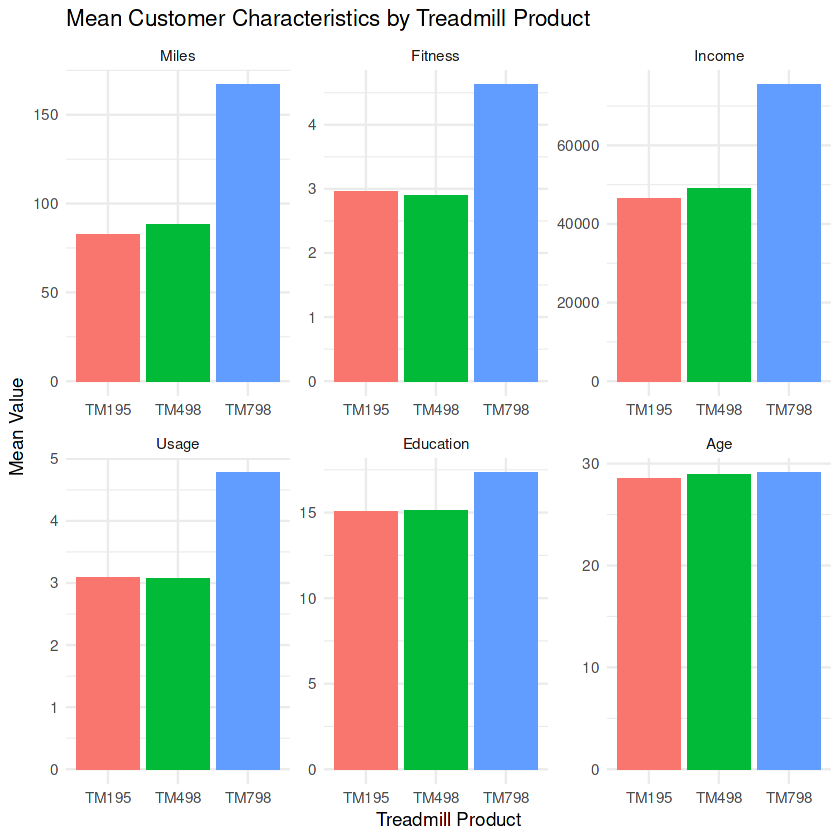

In [21]:
data_long <- melt(aggregate_numerical, id.vars = "Product")

ggplot(data_long, aes(x = Product, y = value, fill = Product)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~variable, scales = "free") +  
  theme_minimal() +
  ggtitle("Mean Customer Characteristics by Treadmill Product") +
  xlab("Treadmill Product") +
  ylab("Mean Value") +
  theme(legend.position = "none")

**Individuals with higher expected miles, level of fitness, Income, Usage and even education prefer TM798.**

In [22]:
aggregate_all <- aggregate(cbind(Miles, Fitness,Income,Usage,Education,Age) ~ Product + MaritalStatus + Gender, data = data, FUN = mean)

aggregate_TM195 <- subset(aggregate_all, Product == "TM195")

aggregate_TM498 <- subset(aggregate_all, Product == "TM498")

aggregate_TM798 <- subset(aggregate_all, Product == "TM798")

aggregate_TM195

aggregate_TM498

aggregate_TM798

,Product,MaritalStatus,Gender,Miles,Fitness,Income,Usage,Education,Age
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TM195,Partnered,Female,74.92593,2.851852,46153.78,2.851852,14.88889,28.33333
4,TM195,Single,Female,78.84615,2.923077,45742.38,3.000000,15.53846,28.69231
7,TM195,Partnered,Male,80.19048,2.857143,50028.00,3.285714,15.42857,31.38095
10,TM195,Single,Male,99.52632,3.263158,43265.84,3.263158,14.47368,25.63158


,Product,MaritalStatus,Gender,Miles,Fitness,Income,Usage,Education,Age
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,TM498,Partnered,Female,94.00000,2.933333,49724.80,3.333333,15.20000,30.00000
5,TM498,Single,Female,80.21429,2.785714,48920.36,2.928571,15.21429,28.14286
8,TM498,Partnered,Male,87.23810,2.904762,49378.29,2.857143,15.28571,30.38095
11,TM498,Single,Male,91.10000,3.000000,47071.80,3.300000,14.50000,25.20000


,Product,MaritalStatus,Gender,Miles,Fitness,Income,Usage,Education,Age
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,TM798,Partnered,Female,215.0000,5.000000,84972.25,5.250000,17.50000,29.00000
6,TM798,Single,Female,133.3333,4.000000,58516.00,4.666667,18.33333,24.33333
9,TM798,Partnered,Male,176.3158,4.631579,81431.37,4.842105,17.42105,30.00000
12,TM798,Single,Male,147.5714,4.642857,68216.43,4.571429,16.92857,28.92857


**As we can see in this analysis, the products are quite similar, however, a female who's planning to run more than 80 and less than 130 miles per week should take the TM498.**

# Conclusions

1. Partnered Individuals tend to purchase more treadmills than single individuals in general.
2. Partnered females specifically prefer the TM195, and partnered males tend to purchase the TM498, while single males prefer the TM195 or TM798 depending on income and fitness goals. Additionally, females with miles between 80 and 130 prefer the TM498
3. The highest rates of purchases for the TM798 model is by males, and customers with higher income, usage, miles, education, fitness, and age tend to purchase this model in general.
4. Someone opting for the cheapest model should purchase the TM195.

# Recommendations

1. Increase advertisments for partnered individuals.
2. middle-class females, especially partnered females should be recommended the TM498.
3. Higher-class customers with great fitness level and dedicated high-mileage runner should purchase the TM798 model. This could be advertised for gym owners or well renowned fitness influencers.
4. People with lower income and moderate fitness goals who aim for an average of 3 uses per week (a regular run) should purchase the TM195 model. Advertisments could be placed on regular running tracks along the beach or a forest for this specific model.